# 02. Исследовательский анализ данных

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<a id="start"></a>
# Содержание
1. [Изучение общей информации](#part1)
2. [Предобработка данных](#part2)
    * [Изменение названия столбцов](#part2.1)
    * [Обработка пропусков](#part2.2)
    * [Исправление ошибок](#part2.3)
    * [Преобразование типов данных](#part2.4)
3. [Добавление данных](#part3)
4. [Исследовательский анализ данных](#part4)
5. [Общий вывод](#total)

## Изучение общей информации 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод**

Необходима предобработка данных, а именно:
1. Привести названия столбцов в нижний регистр
2. Определить и изучить пропущенные значения, при возможности, произвести их замену.
3. Разобраться с нулевыми значениями в столбце `rooms`.
4. Преобразовать тип данных в некоторых столбцах.

## Предобработка данных

### Изменение названия столбцов

Преобразуем названия столбцов в нижний регистр

In [6]:
df.columns = df.columns.str.lower()

In [7]:
# Изменим название столбца, характеризующего расстояние до центра города
df.columns = df.columns.str.replace('citycenters_nearest','city_centers_nearest')

In [8]:
# Проверяем
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Вывод**

Видим, что названия всех столбцов датасета приведены к единому виду - к нижнему регистру.

### Обработка пропусков

Посмотрим в каких столбцах присутствуют пропущенные значения и как часто.

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Обработка столбца 'is_apartment'
Посмотрим какие значения встречаются в столбце `is_apartment`

In [10]:
df['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Аппартаменты, в настоящее время, на рынке недвижимости не могут сравниться по количеству с квартирами, тем более в рассматриваемом регионе (г. Санкт-Петербург и близлежайшие населенные пункты). В связи с этим, считаем, что пропуски, допущенные в данном столбце, правильно заменить на `False`

<div class="alert alert-success">
    <p><b>Комментарий от ревьюера: </b>Хорошо, что ты аргументируешь свои действия.</p>
</div>

In [11]:
# Заменяем пропуски в столбце 'is_apartment' на False
df['is_apartment'] = df['is_apartment'].fillna(False) 

In [12]:
# Проверяем внесенные изменения
df['is_apartment'].value_counts(dropna=False)

False    23649
True        50
Name: is_apartment, dtype: int64

#### Обработка столбца 'balcony'
Посмотрим какие значения встречаются в столбце `balcony`

In [13]:
df['balcony'].value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

По выведенной информации можно сделать вывод, что если не указано количество балконов (значение пропущено), то они, скорее всего, вовсе отсутствуют. Поэтому необходимо заменить пропуски на `0`.

In [14]:
# Заменяем пропуски в столбце 'balcony' на '0'
df['balcony'] = df['balcony'].fillna(0) 

In [15]:
# Проверяем внесенные изменения
df['balcony'].value_counts(dropna=False)

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

#### Обработка столбцов 'parks_around3000' и 'parks_nearest'
Посмотрим какие значения встречаются в этих столбцах

In [16]:
df['parks_around3000'].value_counts(dropna=False)

0.0    10106
1.0     5681
NaN     5518
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Наблюдаем 5518 пропущенных значений в столбце `parks_around3000`. Посмотрим на столбец `parks_nearest`.

In [17]:
df['parks_nearest'].isna().sum()

15620

Проверим, нет ли таких строк в таблице, в которых:
    - значения в столбце `parks_around3000` пропущены ('NaN'), а в столбце `parks_nearest` присутствуют;
    - значения в столбце `parks_around3000` равны '0', а в столбце `parks_nearest` присутствуют значения меньше, чем 3000 м.

In [18]:
df.query('parks_around3000.isna()')['parks_nearest'].value_counts(dropna=False)

NaN    5518
Name: parks_nearest, dtype: int64

In [19]:
df.query('parks_around3000 == 0')['parks_nearest'].value_counts(dropna=False)

NaN       10102
3190.0        2
3064.0        1
3013.0        1
Name: parks_nearest, dtype: int64

Проверка пройдена успешно, некорректных сочетаний в данных столбцах не обнаружено. Значит в столбце `parks_around3000` значения пропущены там, где парков в радиусе 3 километров нет, поэтому заменим пропуски на '0'.

In [20]:
# Заменяем пропуски в столбце 'parks_around3000' на '0'
df['parks_around3000'] = df['parks_around3000'].fillna(0) 

In [21]:
# Проверяем внесенные изменения
df['parks_around3000'].value_counts(dropna=False)

0.0    15624
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

<div class="alert alert-success">
    <p><b> Комментарий от ревьюера: </b> Согласен с выполненными заменами. Хорошо, что ты решил проверить не только «пропущенные» значения, но и некорректные. </p>
</div>


#### Обработка столбцов 'ponds_around3000' и 'ponds_nearest'
Аналогичные действия произведем со столбцами `ponds_around3000` и  `ponds_nearest`.

In [22]:
df['ponds_around3000'].value_counts(dropna=False)

0.0    9071
1.0    5717
NaN    5518
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

Наблюдаем 5518 пропущенных значений в столбце `ponds_around3000`. Посмотрим на столбец `ponds_nearest`.

In [23]:
df['ponds_nearest'].isna().sum()

14589

Проверим, нет ли таких строк в таблице, в которых:
    - значения в столбце `ponds_around3000` пропущены ('NaN'), а в столбце `ponds_nearest` присутствуют;
    - значения в столбце `ponds_around3000` равны '0', а в столбце `ponds_nearest` присутствуют значения меньше, чем 3000 м.

In [24]:
df.query('ponds_around3000.isna()')['ponds_nearest'].value_counts(dropna=False)

NaN    5518
Name: ponds_nearest, dtype: int64

In [25]:
df.query('ponds_around3000 == 0')['ponds_nearest'].value_counts(dropna=False)

NaN    9071
Name: ponds_nearest, dtype: int64

И в этом случае проверка пройдена успешно, некорректных сочетаний не обнаружили. Значит в столбце `ponds_around3000` значения пропущены там, где водоемов в радиусе 3 километров нет, поэтому заменим пропуски на '0'.

In [26]:
# Заменяем пропуски в столбце 'ponds_around3000' на '0'
df['ponds_around3000'] = df['ponds_around3000'].fillna(0) 

In [27]:
# Проверяем внесенные изменения
df['ponds_around3000'].value_counts(dropna=False)

0.0    14589
1.0     5717
2.0     1892
3.0     1501
Name: ponds_around3000, dtype: int64

#### Обработка остальных столбцов с пропусками

In [28]:
#Посмотрим на столбцы с пропусками
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-warning">
    <p><b> Комментарий от ревьюера: </b> Это довольно сильные предположения, что жилая площадь (кухня, расстояние до центра и т.д.) занимают определённый процент квартиры. Заменяя пропущенные значения на среднее, мы вносим дополнительную погрешность в результаты. Возможно, более правильно оставить пропуски (чтобы не удалять записи совсем, т.к. можем использовать в каких-нибудь исследованиях), и не учитывать такие записи при исследовании зависимости чего-нибудь от площади кухни. </p>
    <p>Не знаю, считается ли такой пример. Есть квартира-студия. По сути у неё кухня занимаю туже площадь, что и спальня (и рабочий кабинет, и гостиная и т.д.) - почти всю площадь квартиры. Корректно ли тут задавать размер кухни? То, какую часть квартиры занимает кухня? </p>
</div>


<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b> 
        Михаил, я согласен, что замена пропусков в столбцах с жилой площадью и площадью кухни вносит дополнительную погрешность. И вместе с этим прошу заметить, что коэффициент корреляции между жилой площадью и общей составляет почти 94%, поэтому в этом случае погрешность хоть и будет, но минимальная.
<br>По поводу замены пропусков в столбце с площадью кухни согласен с тобой, правильнее было бы оставить как есть. Учту на будущее)
    </div>

<div class="alert alert-success">
    <p><b> Комментарий от ревьюера v2: </b> Это было скорее о том, что стоит быть аккуратнее с такими действиями. И несколько раз подумать об их целесообразности. </p>
</div>


In [29]:
df.corr()['living_area']['total_area']

0.9395373338721552

Значения жилой площади коррелируют со значениями общей площади, поэтому для заполнения пропусков в столбце `living_area` найдем среднее значение отношения жилой площади к общей. После этого заполняем  пропуски в `living_area` путем деления `total_area` на найденный коэффициент.

In [30]:
# Находим коэффициент, характеризующий отношение жилой площади к общей
index_living_total = (df['living_area'] / df['total_area']).mean()
index_living_total

0.5647655216993234

In [31]:
# Заполняем пропуски на найденные медианные значения
df['living_area'] = df['living_area'].fillna(df['total_area'] * index_living_total)

Площадь кухни также зависима от общей площади. Для заполнения пропусков в столбце `kitchen_area` проведем те же действия, что и для жилой площади, предварительно рассчитав среднее значение отношения площади кухни к общей площади.

In [32]:
# Находим коэффициент, характеризующий отношение площади кухни к общей площади
index_kitchen_total = (df['kitchen_area'] / df['total_area']).mean()
index_kitchen_total

0.1873547387717406

In [33]:
# Заполняем пропуски
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * index_kitchen_total)

Проверим ошибочные соотношения площадей: общей, кухни и жилой.

In [34]:
df.query('kitchen_area >= total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [35]:
df.query('living_area >= total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9861,10,2350000.0,25.0,2017-12-03T00:00:00,0,NaN,22.0,25.0,17,False,...,4.683868,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,13.0
12691,1,3700000.0,24.2,2017-11-10T00:00:00,0,NaN,19.0,24.2,13,False,...,4.533985,1.0,Санкт-Петербург,17837.0,16840.0,0.0,NaN,2.0,210.0,74.0


In [36]:
df.query('living_area + kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,...,6.200000,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,...,18.360764,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,...,5.079187,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,False,...,5.000000,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,...,9.280000,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22246,6,3100000.0,27.30,2018-05-29T00:00:00,0,2.70,16.0,23.30,15,False,...,5.114784,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0
22907,9,65000000.0,228.00,2016-06-02T00:00:00,4,NaN,5.0,200.00,2,False,...,42.716880,0.0,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN
23102,0,5800000.0,66.00,2017-06-09T00:00:00,5,NaN,5.0,55.50,1,False,...,12.365413,0.0,Санкт-Петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21.0
23191,3,1900000.0,18.90,2016-04-04T00:00:00,1,NaN,16.0,16.00,12,False,...,3.541005,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,115.0


In [37]:
# Удаляем строки с явными ошибками
df = df.query('living_area < total_area')
df = df.query('living_area + kitchen_area <= total_area')

Пропуски в столбце `ceiling_height` заменим на медианное значение по этому столбцу.

In [38]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Тоже самое проделаем для `city_centers_nearest`.

In [39]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df['city_centers_nearest'].median())

Строки, содержащие пропуски в столбцах `floors_total`, `locality_name` и `days_exposition`, удалим из таблицы. 

In [40]:
df.dropna(subset=['floors_total', 'locality_name', 'days_exposition'], inplace=True)

Информация с расстояниями до ближайших парков и водоемов не так важна, как сам факт наличия этих парков и водоемов (такая информация содержится в столбцах `parks_around3000` и `ponds_around3000`), поэтому удалим эти столбцы. Также, в рамках исследования, информация о расстоянии до аэропорта не актуальна, поэтому удалим столбец `airports_nearest`.

In [41]:
df.drop(['airports_nearest', 'parks_nearest', 'ponds_nearest'], axis=1, inplace=True)

In [42]:
# Проверяем выполненную обработку пропущенных значений
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
city_centers_nearest    0
parks_around3000        0
ponds_around3000        0
days_exposition         0
dtype: int64

**Вывод**

Заменили пропущенные значения в столбцах `is_apartment`, `balcony`, `parks_around3000`, `ponds_around3000`, `living_area`, `kitchen_area`, `ceiling_height` и `city_centers_nearest`. Пропуски в остальных столбцах удалили из таблицы.

<div class="alert alert-success">
    <p><b> Комментарий от ревьюера: </b> Хорошо. Ты аргументируешь то, почему делаешь именно такие замены, делаешь предположения о причине пропусков. </p>
    <p>В итоговый вывод по пункту можно расширить. В нём можно описать возникшие проблемы, рассказать о приведении названий к единому виду и т.д.</p>
</div>


<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b> 
    <br><b>Вывод:</b>
    Изменили название столбца с расстоянием до центра города на более подходящее, а также привели названия всех столбцов в нижний регистр. Заменили пропущенные значения в столбцах is_apartment, balcony, parks_around3000, ponds_around3000, living_area, kitchen_area, ceiling_height и city_centers_nearest. Для заполнения пропусков в столбцах с жилой площадью и площадью кухни находили среднее значение отношения площадей (жилой к общей, площади кухни к общей). Пропуски в остальных столбцах удалили из таблицы.
    </div>
    
<div class="alert alert-success">
    <p><b> Комментарий от ревьюера v2: </b>Хорошо</p>
</div>


### Исправление ошибок

Рассмотрим значения в столбце `rooms`.

In [43]:
df['rooms'].value_counts()

1     7191
2     6844
3     4772
4      932
5      249
0      162
6       75
7       37
8       10
9        4
14       2
10       2
15       1
11       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Любое помещение, имеющие внешние стены, будет содержать в себе хотя бы одну комнату. По этом причине, наличие '0' в списке значений вызывает вопросы. Заменим `0` на `1`.

In [44]:
df['rooms'] = df['rooms'].replace(0, 1)

In [45]:
# Проверяем
df['rooms'].value_counts()

1     7353
2     6844
3     4772
4      932
5      249
6       75
7       37
8       10
9        4
14       2
10       2
15       1
11       1
19       1
16       1
12       1
Name: rooms, dtype: int64

**Вывод**

Произвели замену нулевых значений в столбце `rooms`.

<div class="alert alert-success">
    <p><b>Комментарий от ревьюера: </b>Интересное рассуждение. А как же крытая веранда или беседка без стен? :) </p>
    <p>Хотя, у нас же датасет квартир</p>
</div>

### Преобразование типов данных

Посмотрим на типы данных, присутствующие в рассматриваемом датафрейме и принимаемые значения в рамках столбцов.

In [46]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
city_centers_nearest    float64
parks_around3000        float64
ponds_around3000        float64
days_exposition         float64
dtype: object

In [47]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition
count,20285.000000,2.028500e+04,20285.000000,20285.000000,20285.000000,20285.000000,20285.000000,20285.000000,20285.000000,20285.000000,20285.000000,20285.000000,20285.000000,20285.000000
mean,9.635889,6.264104e+06,58.895357,2.034804,2.714339,10.851220,33.563755,5.966921,10.400278,0.593493,14026.396056,0.463840,0.587035,180.963175
std,5.658321,1.086781e+07,34.084036,1.041474,0.959471,6.640882,21.343784,4.925169,5.805367,0.950094,7548.810448,0.744292,0.878813,219.941541
min,0.000000,1.219000e+04,13.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,208.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,39.700000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,11001.000000,0.000000,0.000000,45.000000
50%,9.000000,4.500000e+06,50.900000,2.000000,2.650000,9.000000,29.932573,4.000000,9.000000,0.000000,13095.000000,0.000000,0.000000,95.000000
75%,14.000000,6.500000e+06,67.800000,3.000000,2.700000,16.000000,41.100000,8.000000,11.850000,1.000000,15369.000000,1.000000,1.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,65968.000000,3.000000,3.000000,1580.000000


Преобразуем типы данных в следующих столбцах:
1. `first_day_exposition` в 'datetime64', т.к. столбец содержит дату и время.
2. `last_price`, `city_centers_nearest`, `days_exposition` в целочисленный тип 'int64', целые значения упростят дальнейшие вычисления.
3. `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` также в целочисленный, поскольку не существует дробного количества парков, водоемов, этажей и балконов.

In [48]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [49]:
df= df.astype({'last_price':'int64',
               'city_centers_nearest':'int64',
               'days_exposition':'int64',
               'floors_total':'int64',
               'balcony':'int64', 
               'parks_around3000':'int64', 
               'ponds_around3000':'int64'})

In [50]:
# Проверяем
df.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
city_centers_nearest             int64
parks_around3000                 int64
ponds_around3000                 int64
days_exposition                  int64
dtype: object

**Вывод**

Изменили типы данных в столбцах `first_day_exposition`, `last_price`, `floors_total`, `balcony`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000` и `days_exposition`, объяснили причины данных преобразований.

<div class="alert alert-success">
    <p><b>Комментарий от ревьюера: </b>Правильно делаешь, что объясняешь причины использованных преобразований.</p>
</div>

## Добавление данных

**3.1**
Найдем цену квадратного метра объекта недвижимости и добавим в таблицу (в новый столбец `square_meter_price`). Для удобства, сразу преобразуем вычисленные значения к целым числам.

In [51]:
df['square_meter_price'] = (df['last_price'] / df['total_area']).astype('int')

<div class="alert alert-warning">
    <p><b>Комментарий от ревьюера: </b>Приведение к целочисленному типу просто отбрасывает дробную часть. Ты хотел применить именно такой вариант округления?</p>
</div>

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Да, хотел сделать именно так, поскольку понимал, что в дальнейшем потребуется переводить в километры и округлять до целых.
</div>

<div class="alert alert-success">
    <p><b>Комментарий от ревьюера v2: </b>тогда всё в порядке.</p>
</div>

Посмотрим на результат вычисления.

In [52]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,square_meter_price
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,18603,0,0,81,82920
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,13933,1,2,558,92785
3,0,64900000,159.0,2015-07-24,3,2.65,14,89.797718,9,False,False,False,29.789403,0,Санкт-Петербург,6800,2,3,424,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,8098,2,1,121,100000
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.100000,0,городской посёлок Янино-1,13095,0,0,55,95065


**3.2**
Найдем день недели, месяц и год публикации объявления. Добавим информацию в новые столбцы `weekday_exposition`, `month_exposition` и `year_exposition` соответственно.

In [53]:
# Находим день недели, в который было опубликовано объявление
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [54]:
# Находим месяц публикации
df['month_exposition'] = df['first_day_exposition'].dt.month

In [55]:
# Находим год публикации
df['year_exposition'] = df['first_day_exposition'].dt.year

In [56]:
# Смотрим результаты вычислений
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,2,посёлок Шушары,18603,0,0,81,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,0,Санкт-Петербург,13933,1,2,558,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,89.797718,9,False,...,0,Санкт-Петербург,6800,2,3,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,8098,2,1,121,100000,1,6,2018
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.400000,5,False,...,0,городской посёлок Янино-1,13095,0,0,55,95065,0,9,2018


**3.3**
Определим категории в соответствии с этажом объекта недвижимости, а именно: 
    - 'первый' - для квартир, расположенных на первом этаже;
    - 'последний' - для объектов, находящихся на последнем этаже;
    - 'другой' - для всех остальных.
Название категории поместим в новый столбец `floor_category`.

In [57]:
# Создаем функцию, которая определяет категорию этажа квартиры
def add_floor_category(row):
    floor = row['floor']
    total_floors = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == total_floors:
        return 'последний'
    else:
        return 'другой'

In [58]:
# Применяем функцию и определяем категорию этажа для каждого объекта недвижимости
df['floor_category'] = df.apply(add_floor_category, axis=1)

In [59]:
# Проверяем
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,посёлок Шушары,18603,0,0,81,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,Санкт-Петербург,13933,1,2,558,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,89.797718,9,False,...,Санкт-Петербург,6800,2,3,424,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,Санкт-Петербург,8098,2,1,121,100000,1,6,2018,другой
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.400000,5,False,...,городской посёлок Янино-1,13095,0,0,55,95065,0,9,2018,другой


**3.4**
Найдем соотношение жилой площади и общей (`ratio_living_total`) и долю площади кухни в общей площади объекта недвижимости (`ratio_kitchen_total`).

In [60]:
df['ratio_living_total'] = df['living_area'] / df['total_area']

In [61]:
df['ratio_kitchen_total'] = df['kitchen_area'] / df['total_area']

In [62]:
# Смотрим результат
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,ponds_around3000,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,ratio_living_total,ratio_kitchen_total
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,0,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,1,2,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,89.797718,9,False,...,2,3,424,408176,4,7,2015,другой,0.564766,0.187355
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2,1,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.400000,5,False,...,0,0,55,95065,0,9,2018,другой,0.473684,0.299342


**3.5**
Для удобства переведем стоимость объектов в миллионы и переименуем столбец `last_price` в `last_price_mln`.

In [63]:
df['last_price'] = df['last_price'] / 1000000

In [64]:
df.columns = df.columns.str.replace('last_price','last_price_mln')

**Вывод**

- рассчитали стоимость квадратного метра;
- определили день недели, месяц и год публикации объявления;
- определили категорию этажа объекта недвижимости;
- нашли отношение жилой площади и кухни к общей площади;
- преобразовали цены объектов недвижимости в миллионы.

<div class="alert alert-success">
    <p><b>Комментарий от ревьюера: </b>Расчёты проведены верно.</p>
</div>

## Исследовательский анализ данных

<div class="alert alert-warning">
    <p><b> Комментарий от ревьюера: </b> Обрати внимание, что ты выполняешь одинаковые действия несколько раз. Отличное место для автоматизации. Например, через функцию или цикл. </p>
</div>


**4.1**
Исследуем отдельные параметры: площадь, цену объекта недвижимости, число комнат, высоту потолков. Для каждого построим график.

Так как нас интересует жилая недвижимость (квартиры), поэтому уберем из исследуемой выборки апартаменты.

In [65]:
df = df.query('is_apartment == False')

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Напишем функцию, выводящую общую информацию о конкретном столбце, диаграмму размаха и гистограмму значений.
    <br>Михаил, далее я убрал предыдущие серии команд и заменил на написанную функцию.
</div>

<div class="alert alert-success">
    <p><b>Комментарий от ревьюера v2: </b>Согласись, что так удобнее</p>
</div>

In [66]:
def show_info(data, column, ylim_min, ylim_max):
    print(data[column].describe())
    plt.ylim(ylim_min, ylim_max)
    data.boxplot(column=column)
    plt.show()
    data.plot(y=column, kind='hist', bins=150, grid=True, figsize=(16,5))

**Общая площадь ('total_area')**

count    20248.000000
mean        58.850989
std         33.918098
min         13.000000
25%         39.700000
50%         50.875000
75%         67.800000
max        900.000000
Name: total_area, dtype: float64


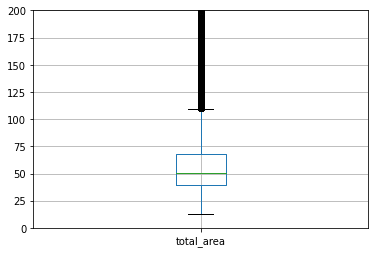

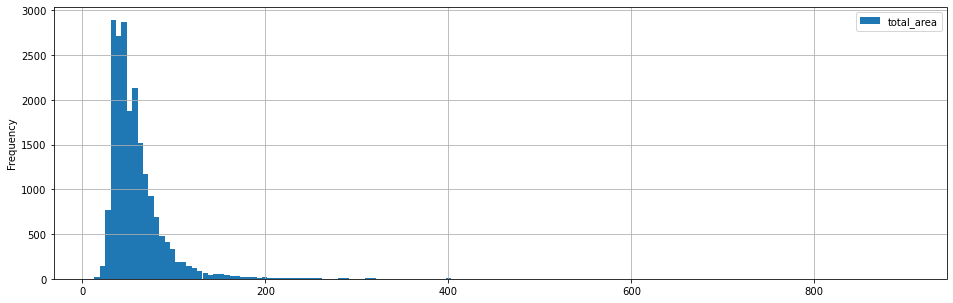

In [67]:
show_info(df, 'total_area', 0, 200)

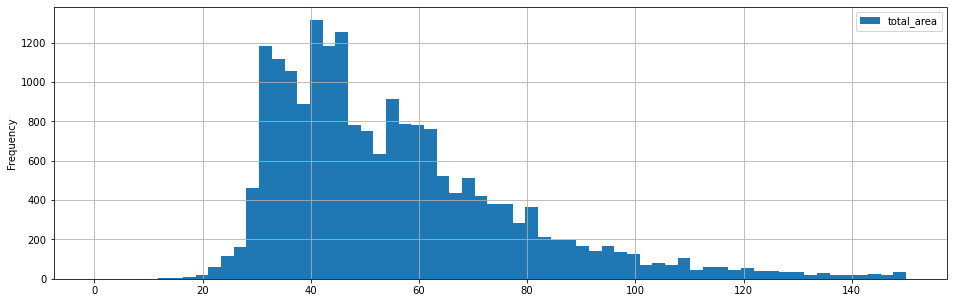

In [68]:
# Укрупняем
df.plot(y='total_area', kind='hist', bins=64, grid=True, range=(0, 150), figsize=(16,5))

**Итоги**

1. Диапазон значений общей площади от 13 до 900 кв.м., среднее значение 58.9 кв.м., медианное - 50.9 кв.м.
2. Больше всего квартир с площадью в диапазоне от 30 до 50 кв.м.
3. Все квартиры с общей площадью, большей ~113 кв.м., являются "выбросами" по отношению ко всей выборке.

**Цена ('last_price_mln')**

count    20248.000000
mean         6.253013
std         10.853077
min          0.012190
25%          3.400000
50%          4.500000
75%          6.500000
max        763.000000
Name: last_price_mln, dtype: float64


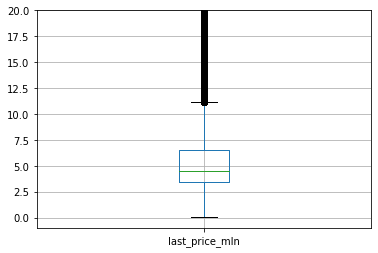

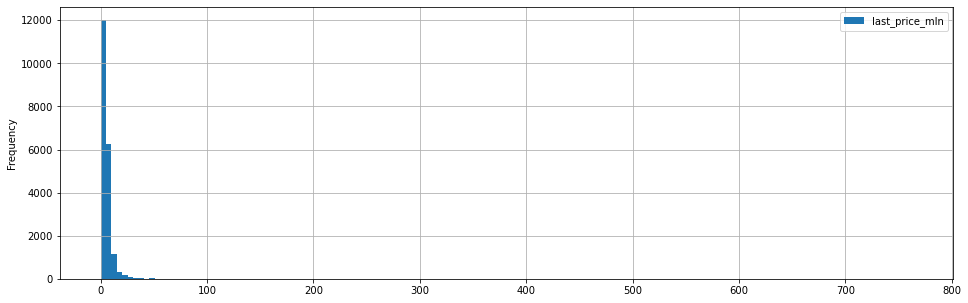

In [69]:
show_info(df, 'last_price_mln', -1, 20)

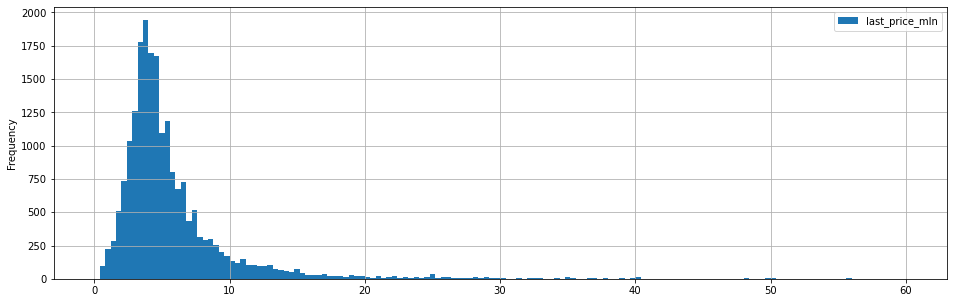

In [70]:
df.plot(y='last_price_mln', kind='hist', bins=150, grid=True, range=(0,60), figsize=(16,5))

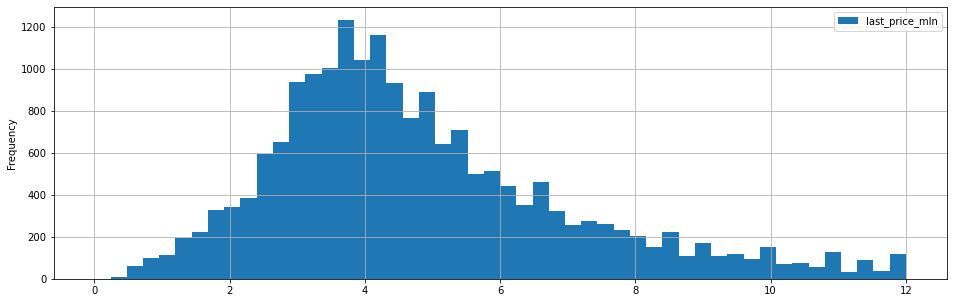

In [71]:
df.plot(y='last_price_mln', kind='hist', bins=50, grid=True, range=(0,12), figsize=(16,5))

**Итоги**

1. Диапазон значений цены квартиры от 12190 до 763 млн., среднее значение 6.25 млн., медианное - 4.5 млн.
2. Больше всего квартир с ценой в диапазоне от 2.5 до 6 млн.
3. Все квартиры с ценой, большей ~11 млн., являются "выбросами" по отношению ко всей выборке.

**Количество комнат ('rooms')**

count    20248.000000
mean         2.034769
std          1.040911
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


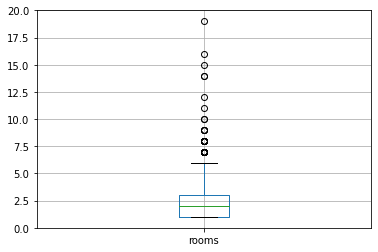

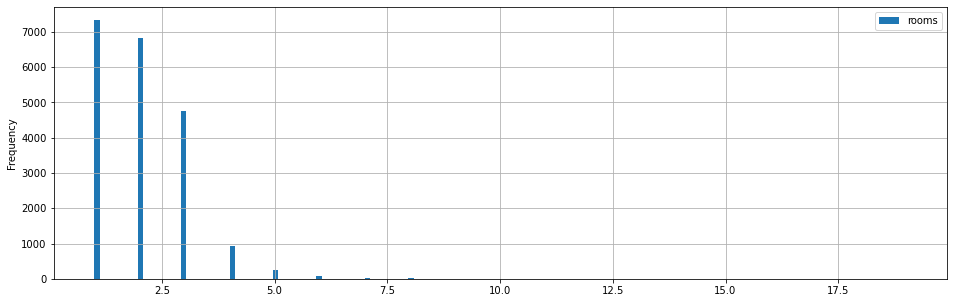

In [72]:
show_info(df, 'rooms', 0, 20)

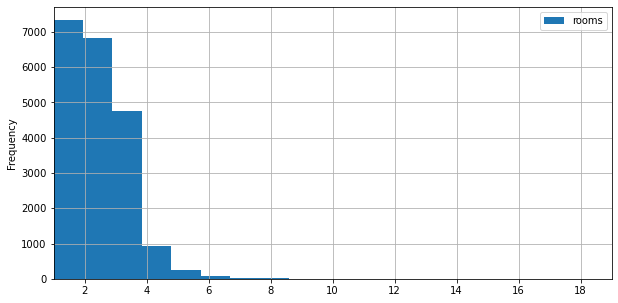

In [73]:
# Укрупняем
df.plot(y='rooms', xlim=(1,19), kind='hist', bins=19, grid=True, figsize=(10,5))

**Итоги**

1. Диапазон значений количества комнат варьируется от 1 до 19, среднее и медианное значение - 2.
2. Наибольшим числом представлены одно- и двухкомнатные квартиры, немного меньшим - трехкомнатные.
3. "Выбросами" для данной выборки являются квартиры, в которых больше шести комнат.

**Высота потолков ('ceiling_height')**

count    20248.000000
mean         2.706749
std          0.634506
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         27.000000
Name: ceiling_height, dtype: float64


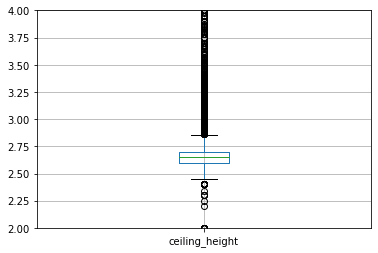

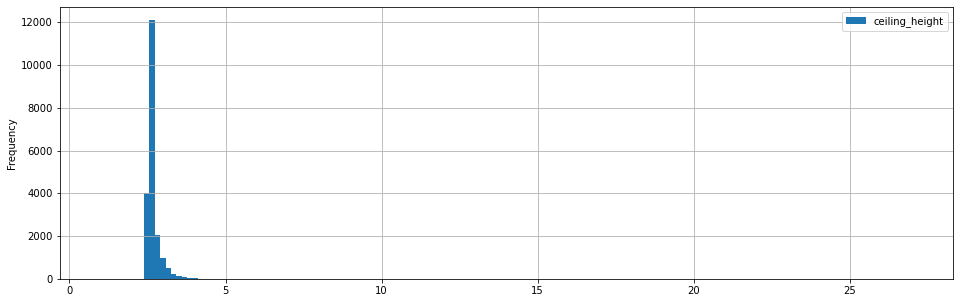

In [74]:
show_info(df, 'ceiling_height', 2, 4)

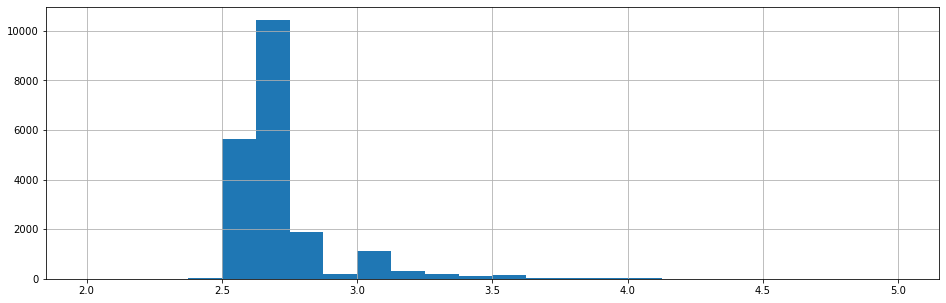

In [75]:
# Укрупняем
df['ceiling_height'].hist(bins=24, range=(2,5), figsize=(16,5))

**Итоги**

1. Значения высоты потолков лежат в диапазоне от 1 м. до 100 м., среднее значение 2.72 м., медианное - 2.65 м.
2. Больше всего квартир с высотой потолков от 2.5 м. до 2.75 м.
3. "Выбросами" для данной выборки являются квартиры, в которых высота потолков меньше 2.45 м. или больше 2.85 м.

<div class="alert alert-success">
    <p><b>Комментарий от ревьюера: </b>Хорошо, что пишешь много промежуточных выводов. Будет удобно, если в конце подпункта будет краткая выдержка из промежуточных выводов.</p>
</div>

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br><b>Вывод:</b>
    Рассмотрев такие параметры, как общая площадь, цена, количество комнат и высота потолков, нашли средние значения, наиболее популярные и редко встречающиеся показатели, на основании которых приняли решение о том, что считать "выбросами" и, в дальнейшем, не учитывать в исследовании.
</div>

<div class="alert alert-success">
    <p><b>Комментарий от ревьюера v2: </b>Хорошо.</p>
</div>

**4.2** Изучим время продажи квартиры ('days_exposition').

count    20248.000000
mean       180.809364
std        219.487915
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


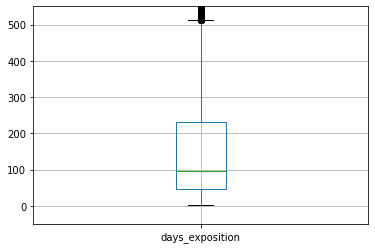

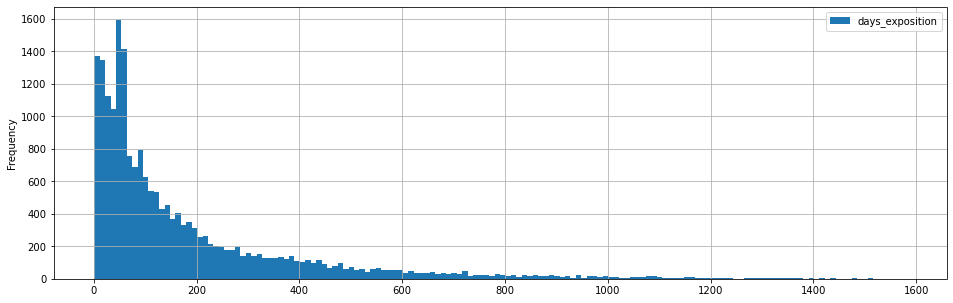

In [76]:
show_info(df, 'days_exposition', -50, 550)

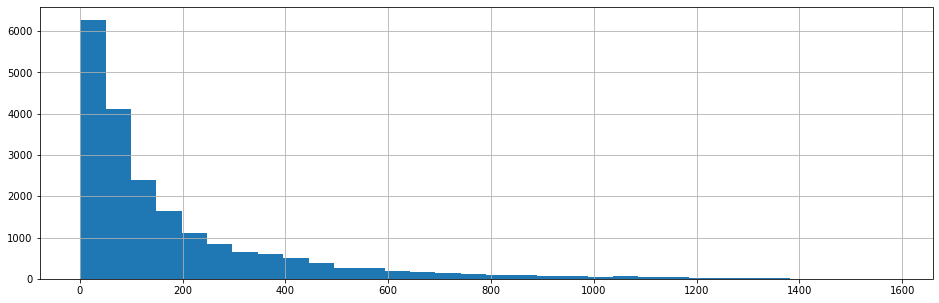

In [77]:
# Строим гистограмму
df['days_exposition'].hist(bins=32, figsize=(16,5))

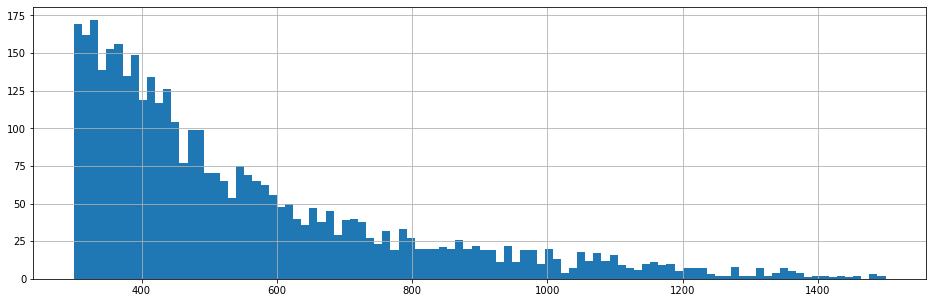

In [78]:
# Построим гистограмму для долгих продаж
df['days_exposition'].hist(bins=100, figsize=(16,5), range=(300,1500))

По проведенным вычислениям получаем следующее: среднее количество дней, за которое квартира продается - 180, медианное значение - 95. Обычно, продажа квартиры занимает до 200-250 дней. Все продажи в срок до 30 дней - быстрые, а все, что больше 800 дней - очень долгие.

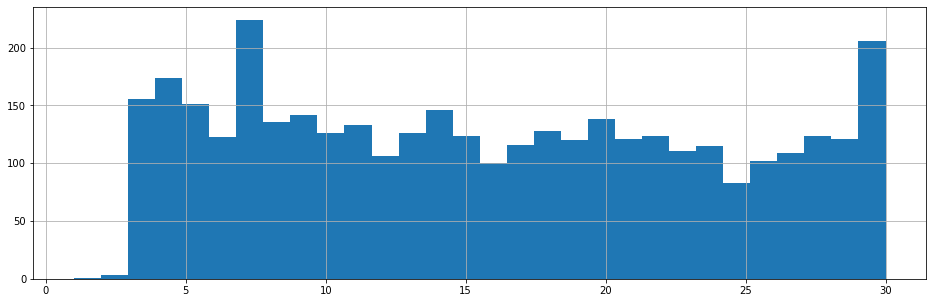

In [79]:
# Построим гистограмму для быстрых продаж
df['days_exposition'].hist(bins=30, figsize=(16,5), range=(1,30))

Видим, что продаж квартир за 1-2 дня очень мало. Уберем из рассмотрения редкие и выбивающиеся значения.

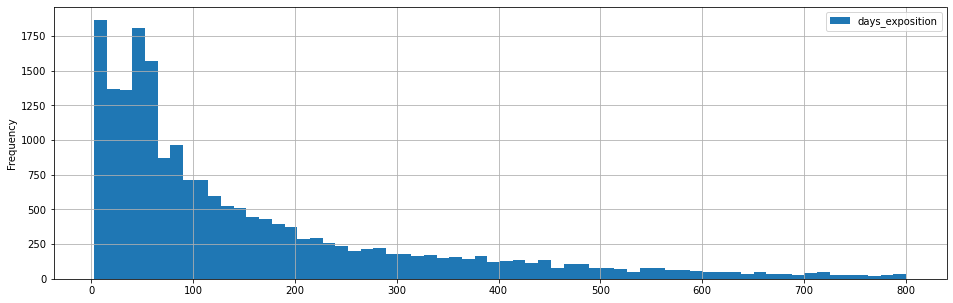

In [80]:
(
    df.query('3 <= days_exposition <= 800')
      .plot(y='days_exposition', 
            kind='hist', 
            bins=64, 
            grid=True, 
            figsize=(16,5))
)

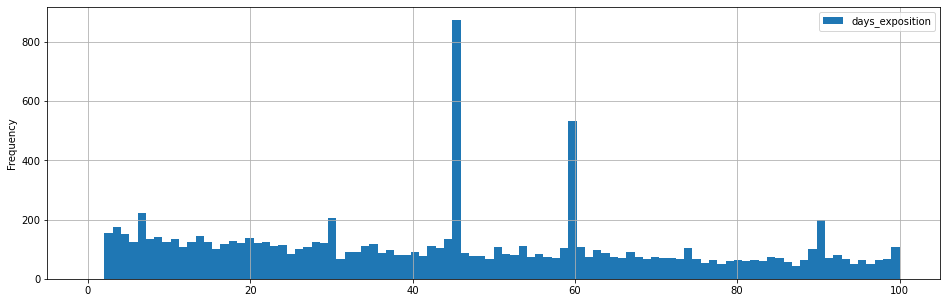

In [81]:
# Посмотрим на продажи в течение первых 100 дней
(
    df.query('3 <= days_exposition <= 800')
      .plot(
          y='days_exposition',
          kind='hist',
          bins=98,
          grid=True,
          figsize=(16,5),
          range=(0,100)
      )
)

Выделяются пики на 1 неделе, 1 и 3 месяцах, и сильно выделяются на 1.5 и 2 месяцах. Возможно это связано с тем, что по прошествии этого количества дней, объявления были автоматически сняты сервисом объявлений. 

Для проведения дальнейшего исследования, уберем редкие и выбивающиеся значения. Оставим квартиры с площадью до 320 кв.м., ценой до 50 млн., с количеством комнат от 1 до 9, высотой потолков от 2.45 до 4.5 метров и временем продажи от 3 до 1460 дней.

In [82]:
df = df.query('total_area<=320 and last_price_mln<=50 and rooms<=9 and (2.45<=ceiling_height<=4.5) and (3<=days_exposition<=1460)')

<div class="alert alert-danger">
    <p><b>Комментарий от ревьюера: </b>Помимо визуального анализа стот использовать корреляцию для того, чтобы определить влияния различных факторов на цену квартиры.</p>
</div>
<div class="alert alert-success">
    <p><b>Комментарий от ревьюера v2: </b>Замечание исправленно.</p>
</div>

Изучим какие факторы больше всего влияют на стоимость квартиры.

In [83]:
# Посмотрим на параметры, которые больше всего влияют на стоимость квартиры
df.corr()['last_price_mln'].sort_values(ascending=False)

last_price_mln          1.000000
total_area              0.775949
square_meter_price      0.690558
living_area             0.679544
kitchen_area            0.621104
rooms                   0.500489
ceiling_height          0.405815
ponds_around3000        0.289254
parks_around3000        0.274793
total_images            0.139802
days_exposition         0.125088
floor                   0.056097
floors_total            0.044337
balcony                 0.038829
ratio_living_total      0.011876
month_exposition        0.004990
weekday_exposition     -0.007404
open_plan              -0.023016
studio                 -0.045320
year_exposition        -0.074184
ratio_kitchen_total    -0.107667
city_centers_nearest   -0.284548
is_apartment                 NaN
Name: last_price_mln, dtype: float64

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Видим, что больше всего цена квартиры зависит от площади, цены квадратного метра и количества комнат.
    <br>Найдем коэффициент корреляции - насколько сильно зависит цена квартиры от ее общей площади.
    <br>Для других зависимостей также найдем коэффициент корреляции и сравним его с построенными графиками.
</div>

In [84]:
df.corr()['last_price_mln']['total_area']

0.7759486897032339

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Довольно высокий показатель в 77.6%. Посмотрим зависимость на графиках.
</div>

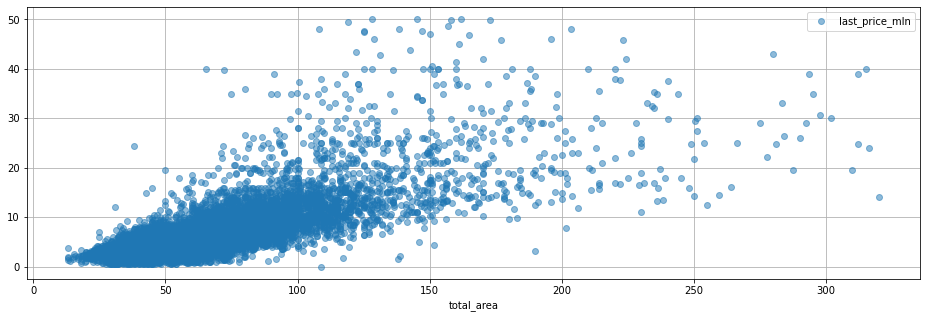

In [85]:
# Зависимость цены от площади
df.plot(x='total_area', y='last_price_mln', style='o', alpha=0.5, figsize=(16,5), grid=True)

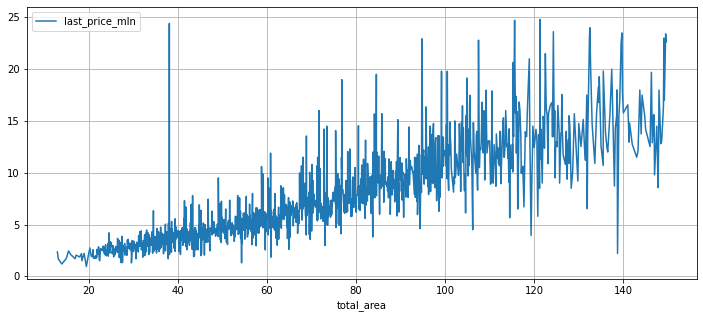

In [86]:
(
    df.query('total_area<150 and last_price_mln<25')
      .pivot_table(index='total_area', values='last_price_mln')
      .plot(figsize=(12,5), grid=True)
)

**Вывод**

По графику видим, что чем больше площадь квартиры, тем больше ее стоимость.

In [87]:
# Зависимость цены от количества комнат
df.corr()['last_price_mln']['rooms']

0.5004885892802088

Зависимость присутствует, но не такая сильная, как в предыдущем случае.

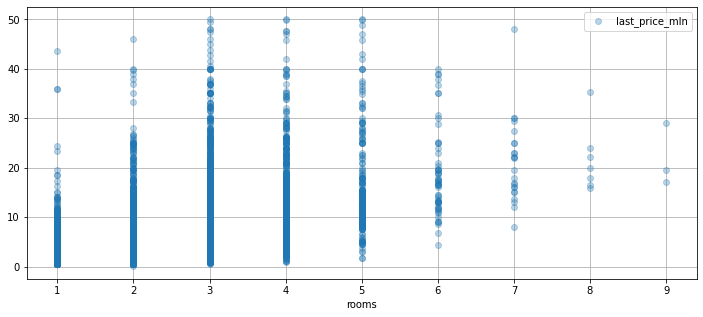

In [88]:
# Зависимость цены от количества комнат
df.plot(x='rooms', y='last_price_mln', style='o', alpha=0.3, figsize=(12,5), grid=True)

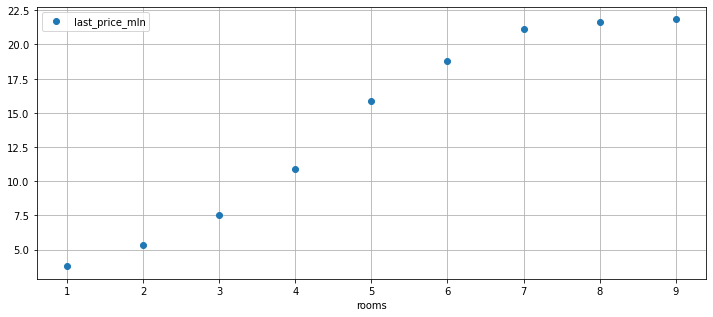

In [89]:
(
    df.pivot_table(index='rooms', values='last_price_mln')
      .plot(style='o', figsize=(12,5), grid=True)
)

**Вывод**

Наблюдаем, что с увеличением количества комнат повышается и цена квартиры.

<div class="alert alert-block alert-info">
    <b>Вывод:</b>
    <br>Видим сильную зависимость между ценой квартиры и количеством комнат для 2-,3-,4-,5- и 6-комнатных квартир. Дальше, при увеличении количества комнат зависимость слабая, изменения в цене незначительные.
</div>

<div class="alert alert-success">
    <p><b> Комментарий от ревьюера v2: </b> На самом деле, то что с ростом площади квартиры или с увеличением количества комнат сильно увеличивается цена - вещь очевидная. Интересные зависимости появляются при рассмотрении цены за квадратный метр. </p>
    <p>Можно не добавлять</p>
</div>


In [90]:
# Зависимость цены от удаленности от центра
df.corr()['last_price_mln']['city_centers_nearest']

-0.2845484828426769

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Значение коэффициента корреляции небольшое, зависимость слабая. Посмотрим на графиках.
</div>

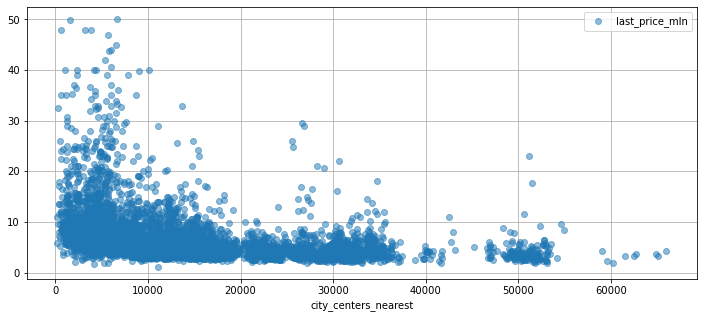

In [91]:
# Зависимость цены от удаленности от центра
(
    df.pivot_table(index='city_centers_nearest', values='last_price_mln', aggfunc='median')
      .plot(style='o', alpha=0.5, figsize=(12,5), grid=True)
)

**Вывод**

Особенностью данной зависимости является тот факт, что у квартир, находящихся близко к центру города, наблюдается больший разброс в ценах.

<div class="alert alert-block alert-info">
    <b>Дополнительный вывод:</b>
    <br>Малый коэффициент корреляции подтверждается и на графиках - с удаленностью от центра цена квартиры уменьшается не прямопропорционально.
</div>

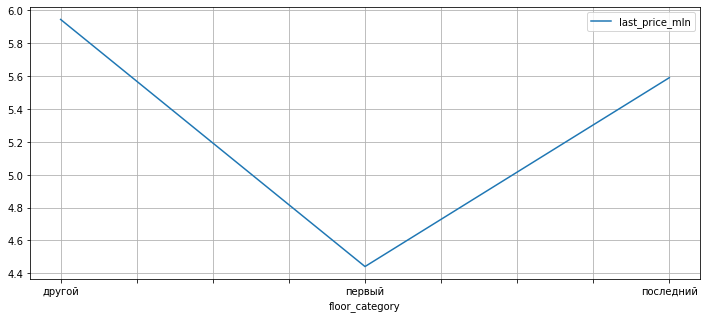

In [92]:
# Зависимость цены от этажа квартиры
(
    df.pivot_table(index='floor_category', values='last_price_mln')
      .plot(figsize=(12,5), grid=True, legend=True)
)

**Вывод**

Здесь мы видим, что квартира, располагающиеся на первых этажах, уступают в цене квартирам, находящимся на последних, и еще больше уступают объектам на других этажах.

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Найдем коэффициент корреляции - насколько сильно зависит цена квартиры от дня недели публикации объявления.
</div>

In [93]:
df.corr()['last_price_mln']['weekday_exposition']

-0.007403516017406055

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Значение коэффициента корреляции практически нулевое, зависимость отсутствует. Посмотрим на графиках.
</div>

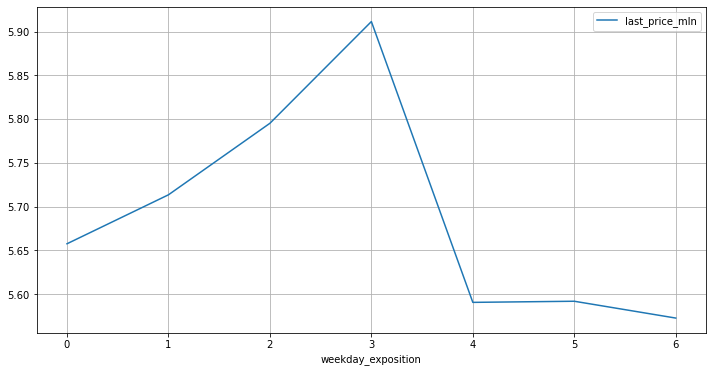

In [94]:
# Зависимость цены от дня недели размещения объявления
(
    df.pivot_table(index='weekday_exposition', values='last_price_mln')
      .plot(figsize=(12,6), grid=True)
)

**Вывод**

Цена на квартиру зависят от дня недели, в который было опубликовано объявление. Так, в выходные дни цены меньше, чем в будние (особенно чем в четверг).

<div class="alert alert-block alert-info">
    <b>Новый вывод:</b>
    <br>Несмотря на то, что на графиках действительно цены квартир разнятся в зависимости от дня недели публикации объявления, все же стоит принимать к сведению коэффициент корреляции, а он почти нулевой. Поэтому вывод следующий - цена квартиры не зависит от дня недели публикации объявления.
</div>

In [95]:
# Зависимость цены от месяца размещения объявления
df.corr()['last_price_mln']['month_exposition']

0.004989756686386102

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Значение коэффициента корреляции также практически нулевое, зависимость отсутствует. Посмотрим на графиках.
</div>

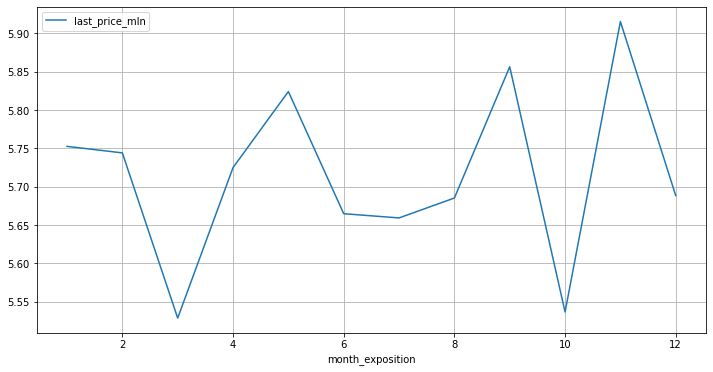

In [96]:
# Зависимость цены от месяца размещения объявления
(
    df.pivot_table(index='month_exposition', values='last_price_mln')
      .plot(figsize=(12,6), grid=True)
)

**Вывод**

Видим, что в мае, сентябре и ноябре, цены квартир выше, чем в марте и октябре.

<div class="alert alert-block alert-info">
    <b>Дополнительный вывод:</b>
    <br>Как и в предыдущем случае, зависимость в математической форме отсутствует, на графической - колебания значений от месяца к месяца присутствуют.
</div>

In [97]:
# Зависимость цены от года размещения объявления
df.corr()['last_price_mln']['year_exposition']

-0.07418420781465429

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Значение коэффициента корреляции также практически нулевое, зависимость отсутствует. Посмотрим на графиках.
</div>

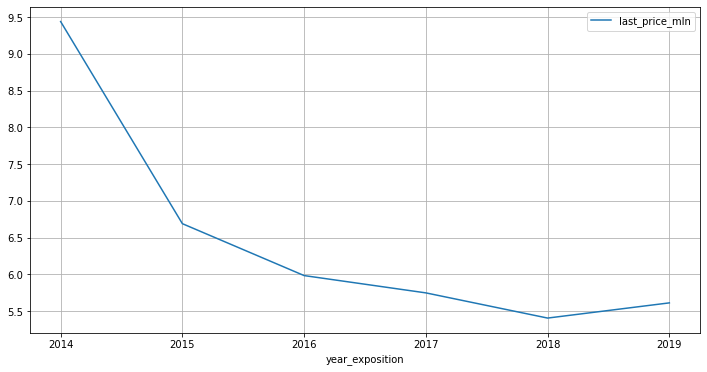

In [98]:
# Зависимость цены от года размещения объявления
(
    df.pivot_table(index='year_exposition', values='last_price_mln')
      .plot(figsize=(12,6), grid=True)
)

**Вывод**

Наблюдаем, что с 2014 по 2018 год был спад по средним ценам на недвижимость. После 2018 года видна положительная динамика в плане роста цен.

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Вывод по зависимости цены от года публикации объявления аналогичный предыдущим.
</div>

<div class="alert alert-success">
    <p><b> Комментарий от ревьюера v2: </b> Вижу, что добавил много промежуточных выводов - хорошо. </p>
</div>


<div class="alert alert-success">
    <p><b>Комментарий от ревьюера: </b>Хорошо, пора переходить к рассмотрению цен относительно населённых пунктов.</p>
</div>

Выберем 10 населённых пунктов с наибольшим числом объявлений.

In [99]:
# 10 населённых пунктов с наибольшим числом объявлений
top10_cities = df['locality_name'].value_counts().head(10)

In [100]:
# Посчитаем среднюю цену квадратного метра в этих населённых пунктах
top10_cities_sqm_pr_mean = (
    df.query('locality_name in @top10_cities.index')
    .groupby('locality_name')['square_meter_price']
    .mean().sort_values(ascending=False)
)

Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

In [101]:
# самая высокая
top10_cities_sqm_pr_mean[top10_cities_sqm_pr_mean == top10_cities_sqm_pr_mean.max()]

locality_name
Санкт-Петербург    109765.876163
Name: square_meter_price, dtype: float64

In [102]:
# самая низкая
top10_cities_sqm_pr_mean[top10_cities_sqm_pr_mean == top10_cities_sqm_pr_mean.min()]

locality_name
Выборг    57049.073892
Name: square_meter_price, dtype: float64

**Вывод**

В итоге получаем, что самое дорогое жилье в Санкт-Петербурге (что логично), а самое доступное - в Выборге.

Изучим предложения квартир в Санкт-Петербурге подробнее. Создадим столбец с расстоянием до центра города в километрах (`city_centers_nearest_km`).

In [103]:
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).astype('int')

D:\Leo\DS\Anaconda\envs\practicum\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
# Выделяем только объявления по Санкт-Петербургу
df_spb = df.query('locality_name == "Санкт-Петербург"')

Теперь посчитаем среднюю цену для каждого километра и построим график.

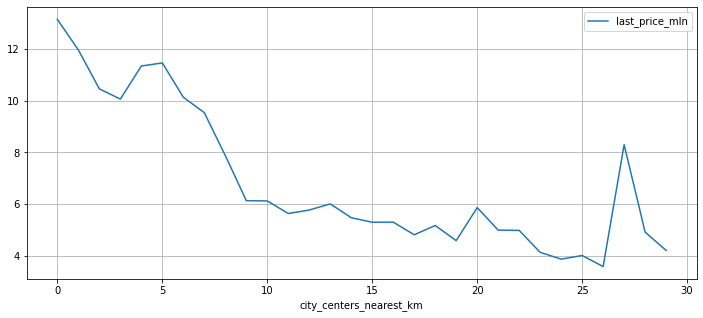

In [105]:
(
    df_spb
    .pivot_table(index='city_centers_nearest_km', values='last_price_mln')
    .plot(figsize=(12,5), grid=True)
)

**Вывод**

Наблюдаем, что цена квартир, расположенных далее 7 километров от центра города, значительно меньше цен квартир, находящихся в пределах 7 километров. Значит, 7 километров - центральная зона Санкт-Петербурга.

Выделим квартиры Санкт-Петербурга, располагающиеся в пределах центральной зоны.

In [106]:
df_spb_center = df_spb.query('city_centers_nearest_km <= 7')

Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

<div class="alert alert-warning">
    <p><b>Комментарий от ревьюера: </b>И вновь, хорошее место ля автоматизации</p>
</div>

**Площадь**

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Для вывода общей информации о столбцах используем функцию show_info()
</div>

<div class="alert alert-success">
    <p><b> Комментарий от ревьюера v2: </b> И вот она уже и пригодилась. </p>
</div>



count    2953.000000
mean       82.966895
std        42.251386
min        13.000000
25%        53.000000
50%        74.000000
75%       100.000000
max       316.300000
Name: total_area, dtype: float64


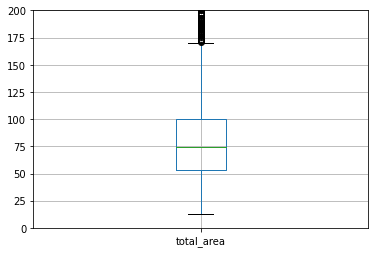

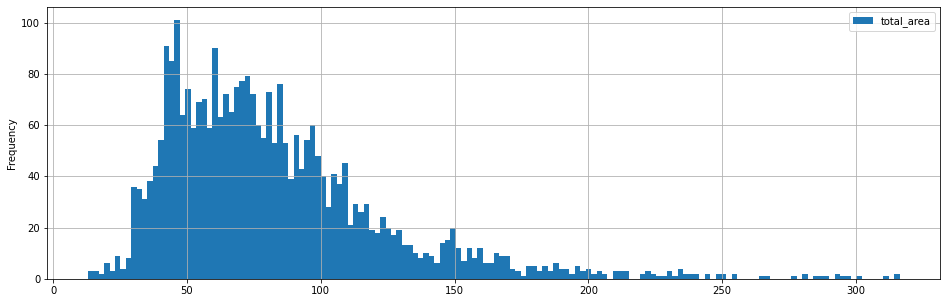

In [107]:
show_info(df_spb_center, 'total_area', 0, 200)

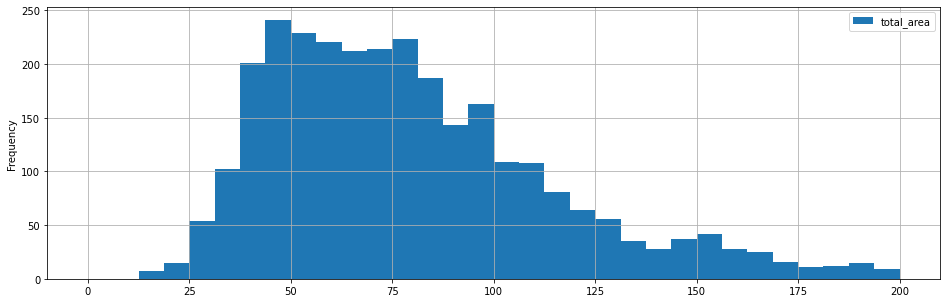

In [108]:
df_spb_center.plot(y='total_area', range=(0, 200), kind='hist', bins=32, grid=True, figsize=(16,5))

**Вывод**

Среднее значение 83 кв.м., медианное - 74 кв.м. Больше всего квартир с площадью в диапазоне от 40 до 90 кв.м. Все квартиры с общей площадью, большей ~170 кв.м., являются "выбросами". 

Сравнивая с результатами, полученными по всей выборке видим, что в центральной зоне Санкт-Петербурга средняя площадь квартир больше.

**Цена квартиры**

count    2953.000000
mean       10.841405
std         7.535115
min         1.600000
25%         6.290000
50%         8.500000
75%        12.500000
max        50.000000
Name: last_price_mln, dtype: float64


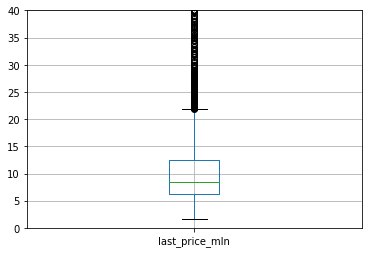

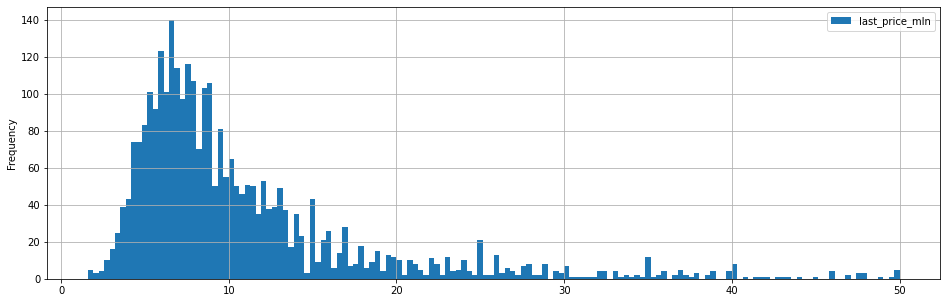

In [109]:
show_info(df_spb_center, 'last_price_mln', 0, 40)

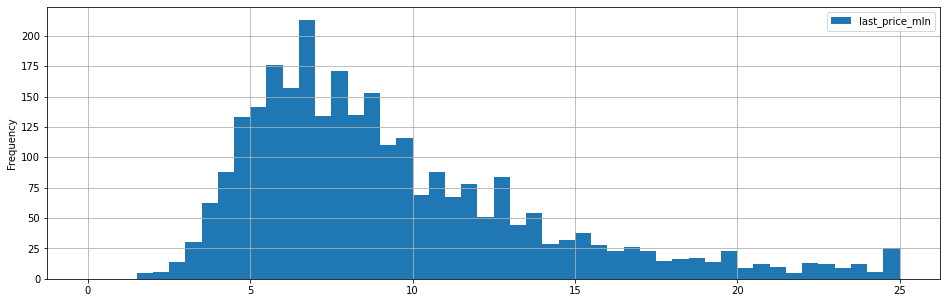

In [110]:
df_spb_center.plot(y='last_price_mln', kind='hist', bins=50, range=(0,25), grid=True, figsize=(16,5))

**Вывод**

Cреднее значение 10.84 млн., медианное - 8.5 млн. больше всего квартир с ценой в диапазоне от 5 до 10 млн. Все квартиры с ценой, большей ~23 млн., являются "выбросами". 

Сравнивая с результатами, полученными по всей выборке видим, что в центральной зоне Санкт-Петербурга средняя цена квартир значительно больше.

**Количество комнат**

count    2953.000000
mean        2.668473
std         1.257018
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         9.000000
Name: rooms, dtype: float64


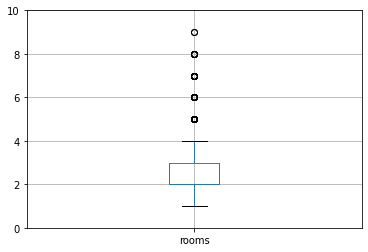

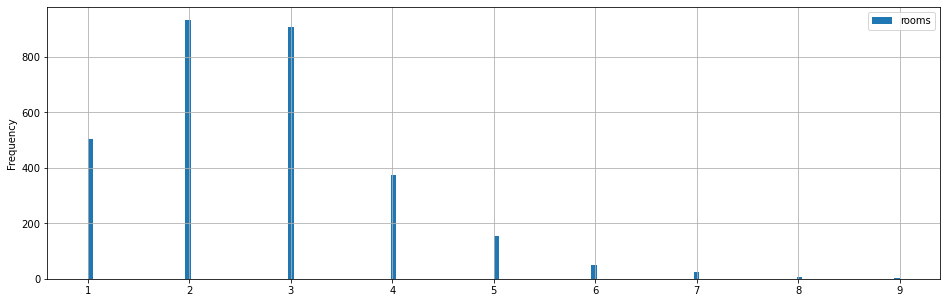

In [111]:
show_info(df_spb_center, 'rooms', 0, 10)

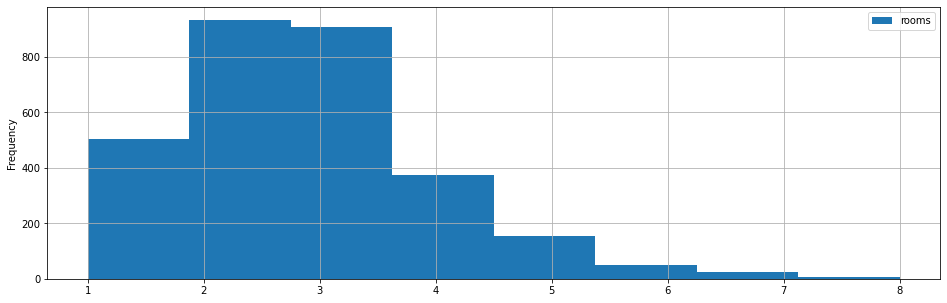

In [112]:
df_spb_center.plot(y='rooms', kind='hist', range=(1,8),  bins=8, grid=True, figsize=(16,5))

**Вывод**

Среднее и медианное значение - 3. Наибольшим числом представлены двух- и трехкомнатные квартиры. "Выбросами" для данной выборки являются квартиры, в которых больше четырех комнат. 

Сравнивая с результатами, полученными по всей выборке видим, что в центральной зоне Санкт-Петербурга большой популярностью пользуются двух- и трехкомнатные квартиры.

**Высота потолков**

count    2953.000000
mean        2.895493
std         0.331175
min         2.450000
25%         2.650000
50%         2.750000
75%         3.100000
max         4.500000
Name: ceiling_height, dtype: float64


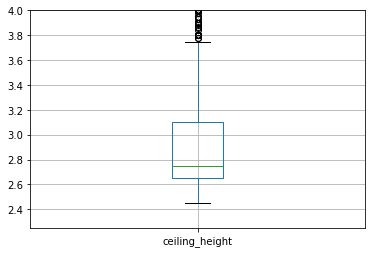

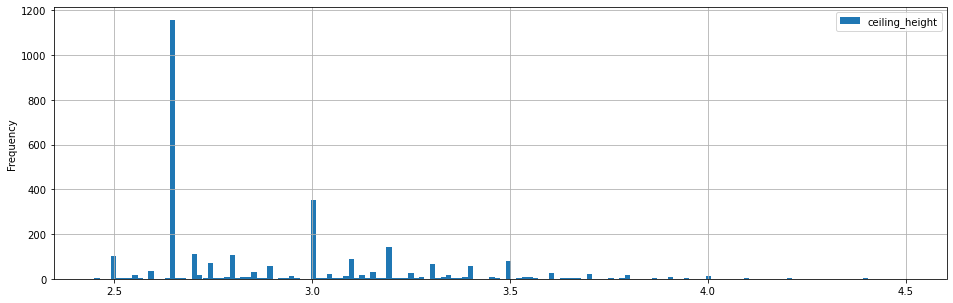

In [113]:
show_info(df_spb_center, 'ceiling_height', 2.25, 4)

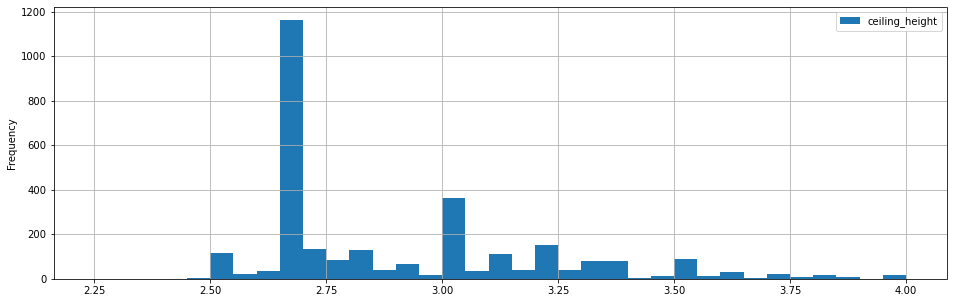

In [114]:
df_spb_center.plot(y='ceiling_height', kind='hist', range=(2.25,4), bins=35, grid=True, figsize=(16,5))

**Вывод**

Среднее значение 2.90 м., медианное - 2.75 м. Больше всего квартир с высотой потолков от 2.65 м. до 2.7 м. "Выбросами" для данной выборки являются квартиры, в которых высота потолков больше 3.75 м.

Сравнивая с результатами, полученными по всей выборке видим, что в центральной зоне Санкт-Петербурга в квартирах более высокие потолки.

<div class="alert alert-danger">
    <p><b>Комментарий от ревьюера: </b>Визуальный анализ - хорошо, но для сравнения влияния различных факторов следует использовать корреляцию. </p>
</div>

In [115]:
# Посмотрим на параметры, которые больше всего влияют на стоимость квартиры
df_spb_center.corr()['last_price_mln'].sort_values(ascending=False)

last_price_mln             1.000000
total_area                 0.712961
square_meter_price         0.646430
living_area                0.601206
kitchen_area               0.573154
rooms                      0.456177
ceiling_height             0.174240
total_images               0.153353
floor                      0.128701
balcony                    0.117647
parks_around3000           0.114932
days_exposition            0.109367
floors_total               0.086713
ponds_around3000           0.056536
open_plan                  0.003497
weekday_exposition        -0.002661
ratio_living_total        -0.020804
month_exposition          -0.020976
studio                    -0.043205
city_centers_nearest      -0.049626
city_centers_nearest_km   -0.055339
year_exposition           -0.067154
ratio_kitchen_total       -0.079228
is_apartment                    NaN
Name: last_price_mln, dtype: float64

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Видим, что больше всего цена квартиры зависит от площади, цены квадратного метра и количества комнат.
    <br>Найдем коэффициент корреляции - насколько сильно зависит цена квартиры от ее общей площади.
    <br>Для других зависимостей также найдем коэффициент корреляции и сравним его с построенными графиками.
</div>

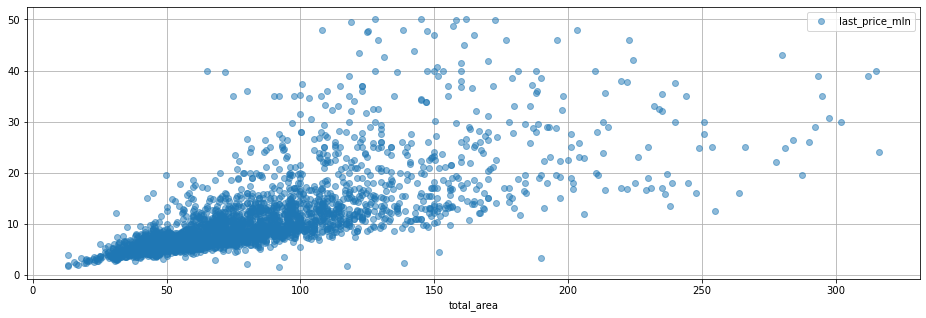

In [116]:
# Зависимость цены от площади
df_spb_center.plot(x='total_area', y='last_price_mln', style='o', alpha=0.5, figsize=(16,5), grid=True)

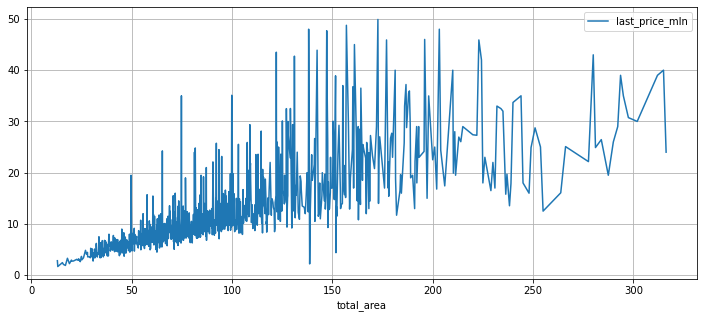

In [117]:
(
    df_spb_center
    .pivot_table(index='total_area', values='last_price_mln', aggfunc='median')
    .plot(figsize=(12,5), grid=True)
)

<div class="alert alert-block alert-info">
    <b>Комментарий от cтудента:</b>
    <br>Видим, что для центральной зоны Санкт-Петербурга, также как и для всех населенных пунктов, с увеличением площади возрастает и цена квартиры.
</div>

Выделим другие факторы, которые влияют на стоимость квартиры в центральной зоне Санкт-Петербурга (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [118]:
df_spb_center.corr()['last_price_mln']['rooms']

0.4561774832709564

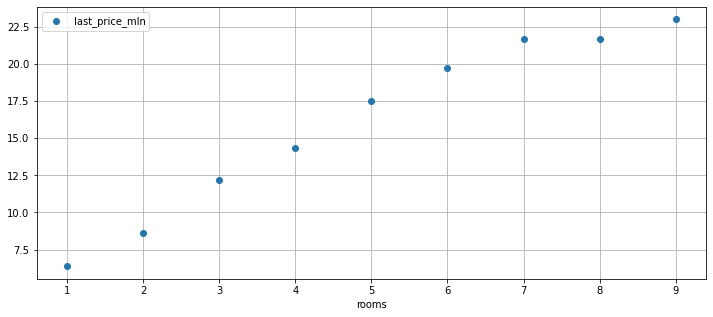

In [119]:
# Зависимость цены от количества комнат
(
    df_spb_center.pivot_table(index='rooms', values='last_price_mln')
                 .plot(style='o', figsize=(12,5), grid=True)
)

**Вывод**

Наблюдаем, что с увеличением количества комнат повышается и цена квартиры. Такой же результат получили и для всей выборки.

<div class="alert alert-block alert-info">
    <b>Дополнение к выводу:</b>
    <br>Для квартир, в которых более 6 комнат, зависимость цены от количества комнат почти отсутствует.
</div>

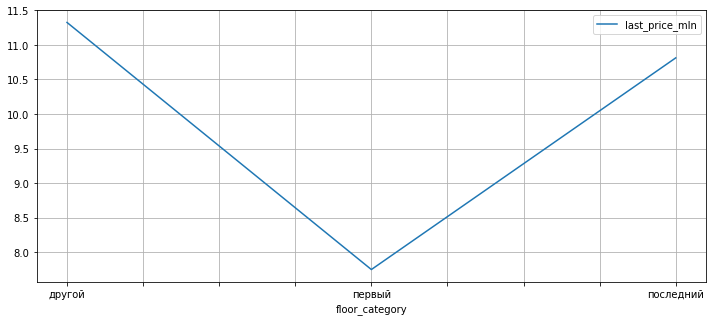

In [120]:
# Зависимость цены от этажа квартиры
(
    df_spb_center.pivot_table(index='floor_category', values='last_price_mln')
      .plot(figsize=(12,5), grid=True, legend=True)
)

**Вывод**

Здесь мы видим, что квартира, располагающиеся на первых этажах, уступают в цене квартирам, находящимся на последних или других этажах, при этом разница в цене между последними этажами и другими незначительная. 

In [121]:
df_spb_center.corr()['last_price_mln']['city_centers_nearest_km']

-0.05533855388127187

<div class="alert alert-block alert-info">
    <b>Комментарий студента:</b>
    <br>Очень низкий коэффициент корреляции, зависимость отсутствует.
</div>

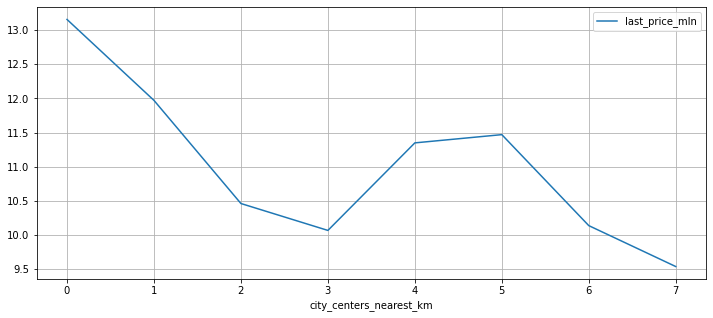

In [122]:
# Зависимость цены от удаленности от центра
(
    df_spb_center.pivot_table(index='city_centers_nearest_km', values='last_price_mln')
                 .plot(figsize=(12,5), grid=True)
)

**Вывод**

И в этом графике тоже все логично - чем дальше от центра, тем дешевле квартира. Однако на расстоянии 4-5 километров от центра, цена выше, чем в квартирах на расстоянии 2-3 километра. Скорее всего это связано с особенностью застройки города.

In [123]:
df_spb_center.corr()['last_price_mln']['weekday_exposition']

-0.0026606244002033304

<div class="alert alert-block alert-info">
    <b>Комментарий студента:</b>
    <br>Очень низкий коэффициент корреляции, зависимость отсутствует.
</div>

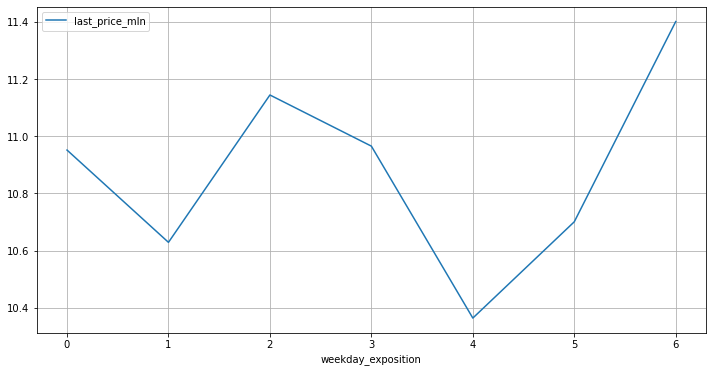

In [124]:
# Зависимость цены от дня недели размещения объявления
(
    df_spb_center.pivot_table(index='weekday_exposition', values='last_price_mln')
                 .plot(figsize=(12,6), grid=True)
)

**Вывод**

В этом случае динамика отличается от той, что была для всей выборки. Видим, что в воскресенье цены выше, чем в будние дни (особенно пятницу).

<div class="alert alert-block alert-info">
    <b>Дополнительный вывод:</b>
    <br>Несмотря на то, что на графиках действительно цены квартир разнятся в зависимости от дня недели публикации объявления, все же стоит принимать к сведению коэффициент корреляции, а он почти нулевой. Цена квартиры не зависит от дня недели публикации объявления.
</div>

In [125]:
df_spb_center.corr()['last_price_mln']['month_exposition']

-0.020976400148886836

<div class="alert alert-block alert-info">
    <b>Комментарий студента:</b>
    <br>Очень низкий коэффициент корреляции, зависимость отсутствует.
</div>

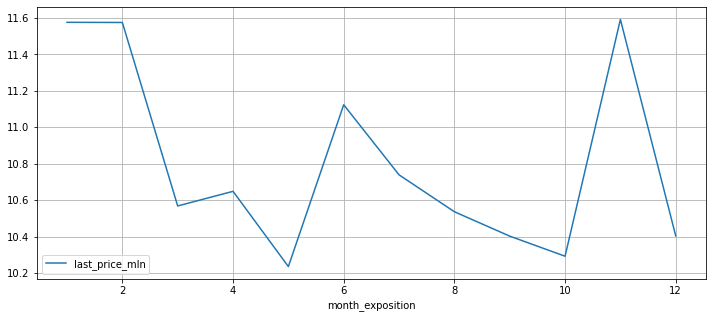

In [126]:
# Зависимость цены от месяца размещения объявления
(
    df_spb_center.pivot_table(index='month_exposition', values='last_price_mln')
                 .plot(figsize=(12,5), grid=True)
)

**Вывод**

Как и во всей выборке, в Санкт-Петербурге цены меняются от месяца к месяцу, но показатели разнятся. В северной столице, цены в январе, феврале и ноябре самые высокие, а в мае и октябре - самые низкие.

<div class="alert alert-block alert-info">
    <b>Дополнительный вывод:</b>
    <br>Как и в предыдущем случае, зависимость в математической форме отсутствует, на графической - колебания значений от месяца к месяца присутствуют.
</div>

In [127]:
df_spb_center.corr()['last_price_mln']['year_exposition']

-0.06715383314192452

<div class="alert alert-block alert-info">
    <b>Комментарий студента:</b>
    <br>Очень низкий коэффициент корреляции, зависимость отсутствует.
</div>

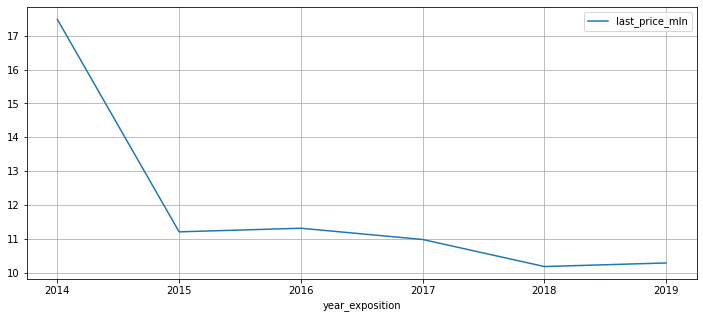

In [128]:
# Зависимость цены от года размещения объявления
(
    df_spb_center.pivot_table(index='year_exposition', values='last_price_mln')
      .plot(figsize=(12,5), grid=True)
)

**Вывод**

Наблюдаем, что в 2014 году был резкий спад по средним ценам на недвижимость. После этого цены находятся примерно на одном уровне, но все также уменьшаются от года к году.

<div class="alert alert-block alert-info">
    <b>Дополнительный вывод:</b>
    <br>Как и в предыдущем случае, зависимость в математической форме отсутствует, на графической - колебания значений от гожа к году присутствуют.
</div>

## Шаг 5. Общий вывод

1. Считали таблицу из файла и изучили общую информацию. Оценили данные, обозначили явные проблемы, наметили план предобработки.
2. Нашли пропуски в таблице. Выдвинули предположения о причинах их возникновения. Заполнили пропущенные значения, где это было уместно.
3. Изменили типы данных в некоторых столбцах на более подходящие.
4. Посчитали и добавили в таблицу новые параметры, такие как цена квадратного метра, день недели, месяц и год публикации объявления, соотношение жилой и общей площади, а также отношение площади кухни к общей.
5. Провели исследовательский анализ данных, а именно:
    - изучили площадь, цену, число комнат и высоту потолков квартир, построили гистограммы;
    - изучили время продажи квартиры, определили быстрые и долгие продажи. Все продажи до 30 дней считаются быстрыми, а те, что дольше 800 дней - долгими.
    - убрали из таблицы редкие и выбивающиеся значения. Редкими квартирами признали объекты, у которых: общая площадь более 320 кв.м., цена - больше 50 млн., у которых больше 9 комнат, а также высота потолков меньше 2.45 м. или больше 4.5 м.
    - изучили зависимости цены квартиры от площади, количества комнат, удаленности от центра, этажа и даты размещения объявления. Подтвердили, что стоимость квартиры сильно зависит от общей площади и количества комнат, а также доказали, что близость к центру, удачный этаж или день публикации объявления не являются основанием для повышения стоимости объекта.
    - нашли населённые пункты с самой высокой и низкой стоимостью жилья. Самое дорогое жилье в Санкт-Петербурге, самое доступное - в Выборге.
    - изучили зависимости цены квартиры, расположенной в центральной области Санкт-Петербурга. Выявили, что формирование цены в северной столице аналогично с другими населенными пунктами.
    
    

<div class="alert alert-danger">
    <p><b> Комментарий от ревьюера: </b> Сейчас в финальном выводе ты описал только то, какие действия произвёл с данными. Стоит добавить в него и то, какие результаты получил, точнее какие выводы смог по ним сделать. Написать можно довольно кратко, т.к. подробно расписано в самой работе. Но общий вывод должен отразить полученные в работе результаты. </p>
</div>


<div style="background:#d4d6fa; color:#000; padding:10px">
    <p><big><b> Комментарий от ревьюера</b></big></p>
    <p>у меня всего два критических комментария к работе (их необходимо исправить) :</p>
    
- Используй, пожалуйста, корреляцию для определения факторов, влияющих на определённую величину.
- Сделай финальный вывод более развёрнутым. Кратко опиши в нём полученные в работе результаты.
    
Основные некритичные замечания связаны с автоматизацией одинаковых действий. В работе есть довольно много мест, в которых выполняемые действия можно автоматизировать с помощью функции или цикла.
    
Жду твоих исправлений 
    
</div>


<div class="alert alert-block alert-info">
    <b>Комментарий студента:</b>
    <br>Михаил, финальный вывод подправил в нем самом. Остальные замечания также устранил и автоматизировал работу, создав функцию вывода общей информации. Спасибо за замечания, все моменты себе пометил, в будем учту. Благодарю за проверку)
</div>

<div style="background:#d4d6fa;color:#000;">
    <p><big><b> Комментарий от ревьюера v2</b></big></p>
    <p>Все замечания исправлены. <b>Проект может быть зачтён.</b></p>
    <p>Удачи со следующим проектом</p>
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод